# 1. Linear Regression in PyTorch from Scratch

In this section, we will simulate some sample data to train a linear regression model. We'll initialize a variable X with values from -4 to 4 and create a linear function that has a slope of 2. Then, this function will be estimated by our trained model later.

In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt

First, we will create a plot of the function with a slope of 2, which is $y=2x$.

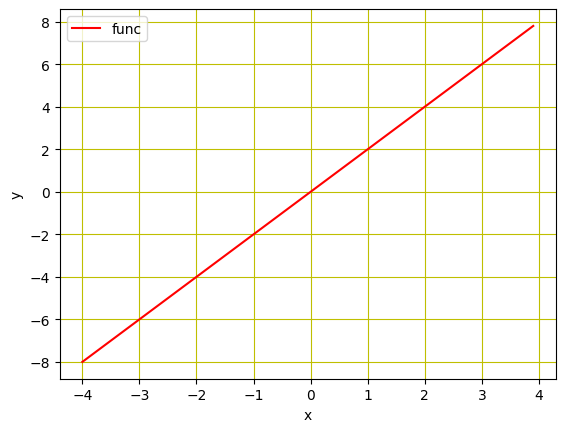

In [51]:
# Creating a function f(X) with a slope of 2
X = torch.arange(-4, 4, 0.1).view(-1, 1)
func = 2 * X

# Plot the line in red with grids
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

Now, you have seen how the line looks like in figure. Next, we will simulate real data by adding some Gaussian noises to the `func`. Here, we define the noises with a standard normal distribution.

In [52]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + torch.randn(X.size())

Now, let's visualize these data points using below lines of code.

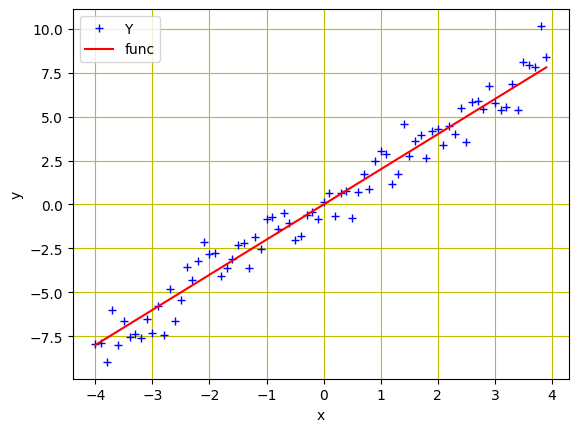

In [53]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

Now, we have training data ready. Next, we are going to build a linear regression model and define loss function.

Below is to define the function which we are going to train later:

In [54]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x

Below is to define the loss function which is going to be minimized during training:

In [55]:
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

Next is some preparation before training:

In [56]:
# Initialize slope w
w = torch.tensor(4.0, requires_grad=True)
# Define hyperparameters
step_size = 0.1
loss_list = []
iter = 20

**Q: What is the function of `requires_grad=True` in the codes above? Can you get rid of it but successfully achieve our goal of training a linear regression model?**

PUT YOUR ANSWER HERE!

Next, we are going to train the model and estimate the parameter/slope `w`.


In [57]:
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	21.205991744995117,	1.913414716720581
1,	0.8953390121459961,	2.053215980529785
2,	0.8041642308235168,	2.043849468231201
3,	0.803754985332489,	2.0444769859313965
4,	0.8037531971931458,	2.0444347858428955
5,	0.8037530779838562,	2.0444376468658447
6,	0.8037530779838562,	2.0444374084472656
7,	0.8037531971931458,	2.0444376468658447
8,	0.8037530779838562,	2.0444374084472656
9,	0.8037531971931458,	2.0444376468658447
10,	0.8037530779838562,	2.0444374084472656
11,	0.8037531971931458,	2.0444376468658447
12,	0.8037530779838562,	2.0444374084472656
13,	0.8037531971931458,	2.0444376468658447
14,	0.8037530779838562,	2.0444374084472656
15,	0.8037531971931458,	2.0444376468658447
16,	0.8037530779838562,	2.0444374084472656
17,	0.8037531971931458,	2.0444376468658447
18,	0.8037530779838562,	2.0444374084472656
19,	0.8037531971931458,	2.0444376468658447


**Q: Did your estimate of slope `w` converge? To what value did it converge to? Is it close to the true value?**

PUT YOUR ANSWER HERE!

Let's visulize how the loss changes over the iterations:

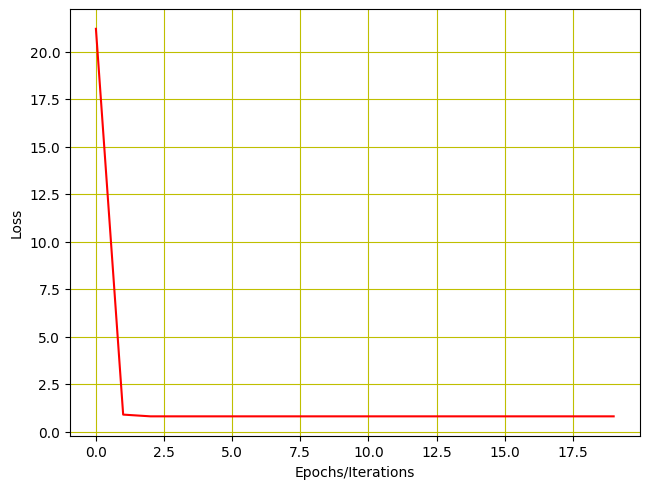

In [58]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

**Assignment: Next, it's your turn to extend the codes above to estimate model with two parameters.**

In this task, you will need to simulate the data from the function **$y=x+4$**, and train a linear regression model to estimate the slope and intercept based on those simulated data.

In [ ]:
### Start your code here


# Linear Regression using PyTorch

PyTorch provides the elegantly designed modules and classes ``torch.nn``, ``Dataset`` , and ``DataLoader`` to help us create and train neural networks. Using these modules and classes, our code can be much simplified a lot.

**Assignment: Simplify the linear regression with two parameters codes above by using PyTorch modules and classes. Initialize parameters randomly (hints: sample codes has been provided in one of the tutorial noteboook).**

In [ ]:
### Start your code here

In [59]:
### Answers:
import torch
import torch.nn as nn

In [60]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

        # Initialize Weights and Bias
        self.weights = nn.Parameter(
            torch.randn(1, 5, dtype=torch.float),
            requires_grad=True)

        self.bias = nn.Parameter(
            torch.randn(1, 5, dtype=torch.float),
            requires_grad=True
            )

    def forward(self, x):
        out = self.linear(x)
        return out

In [61]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

criterion = nn.MSELoss()

In [62]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [63]:
epochs = 100
for epoch in range(epochs):
    epoch += 1

    inputs = X.requires_grad_()
    labels = Y

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 14.119738578796387
epoch 2, loss 11.458646774291992
epoch 3, loss 9.334033012390137
epoch 4, loss 7.6375532150268555
epoch 5, loss 6.28275203704834
epoch 6, loss 5.200641632080078
epoch 7, loss 4.336167812347412
epoch 8, loss 3.6454014778137207
epoch 9, loss 3.093283176422119
epoch 10, loss 2.6518373489379883
epoch 11, loss 2.2987399101257324
epoch 12, loss 2.016174077987671
epoch 13, loss 1.7899223566055298
epoch 14, loss 1.6086368560791016
epoch 15, loss 1.4632627964019775
epoch 16, loss 1.3465733528137207
epoch 17, loss 1.2527997493743896
epoch 18, loss 1.177338719367981
epoch 19, loss 1.1165153980255127
epoch 20, loss 1.0673967599868774
epoch 21, loss 1.0276405811309814
epoch 22, loss 0.9953778982162476
epoch 23, loss 0.9691160917282104
epoch 24, loss 0.9476631879806519
epoch 25, loss 0.9300674200057983
epoch 26, loss 0.9155680537223816
epoch 27, loss 0.9035579562187195
epoch 28, loss 0.8935515284538269
epoch 29, loss 0.8851605653762817
epoch 30, loss 0.87807500362396

In [64]:
# Purely inference
predicted = model(X.requires_grad_()).data.numpy()

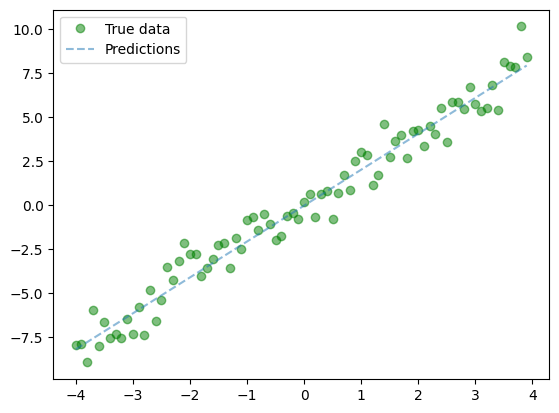

In [68]:
# Plot true data
plt.plot(X.detach().numpy(), Y.numpy(), 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(X.detach().numpy(), predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [72]:
# Get values of parameters
model.state_dict()

OrderedDict([('weights',
              tensor([[-0.7920,  1.5012,  0.6683,  1.5902,  0.7936]])),
             ('bias', tensor([[-1.6619, -0.2099,  0.1473,  1.0694, -0.1464]])),
             ('linear.weight', tensor([[2.0440]])),
             ('linear.bias', tensor([-0.0339]))])

# 2. Logistic Regression using PyTorch

In this section, we will first simulated some data. Then build and train a logistic regression model on these simulated data by using libraries and classes in PyTorch.

Below, we generate two sets of data points, each representing one of the two classes (0 and 1). These data points are sampled from two multivariate normal distributions with different means and a shared covariance matrix. We combine the data points and labels to create the training dataset (X and Y). We also visulize how separated the two classes are.

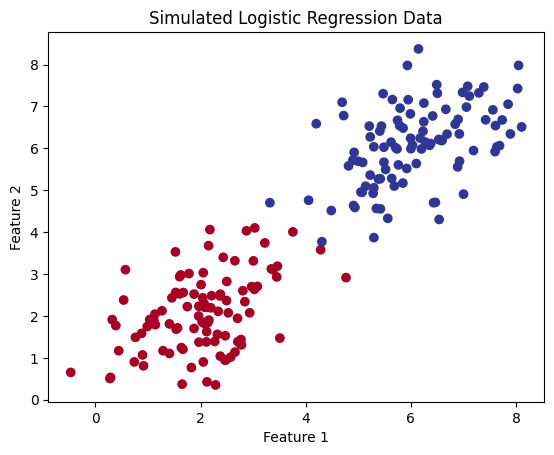

In [73]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set a random seed for reproducibility
torch.manual_seed(42)

# Define data parameters
num_samples = 200
mean_class_0 = [2, 2]
mean_class_1 = [6, 6]
cov_matrix = [[1, 0.5], [0.5, 1]]

# Create class 0 data points
class_0_data = torch.tensor(np.random.multivariate_normal(mean_class_0, cov_matrix, num_samples // 2), dtype=torch.float32)
class_0_labels = torch.zeros(num_samples // 2)

# Create class 1 data points
class_1_data = torch.tensor(np.random.multivariate_normal(mean_class_1, cov_matrix, num_samples // 2), dtype=torch.float32)
class_1_labels = torch.ones(num_samples // 2)

# Combine the data and labels for both classes
X = torch.cat((class_0_data, class_1_data), dim=0)
Y = torch.cat((class_0_labels, class_1_labels), dim=0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Logistic Regression Data')
plt.show()

Below is an example of how to build and train a logistic regression model on the simulated data above using PyTorch:

- We define a logistic regression model using `nn.Linear` and apply a sigmoid activation function to obtain the predicted probabilities.

- We use Binary Cross-Entropy Loss (`nn.BCELoss`) as the loss function, which is suitable for binary classification.

- The optimizer to update the model's parameters is Stochastic Gradient Descent (`optim.SGD`).

<ipython-input-74-f98c8062854b>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
<ipython-input-74-f98c8062854b>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)


Epoch [100/1000], Loss: 0.5104
Epoch [200/1000], Loss: 0.4821
Epoch [300/1000], Loss: 0.4565
Epoch [400/1000], Loss: 0.4332
Epoch [500/1000], Loss: 0.4121
Epoch [600/1000], Loss: 0.3928
Epoch [700/1000], Loss: 0.3752
Epoch [800/1000], Loss: 0.3591
Epoch [900/1000], Loss: 0.3444
Epoch [1000/1000], Loss: 0.3308


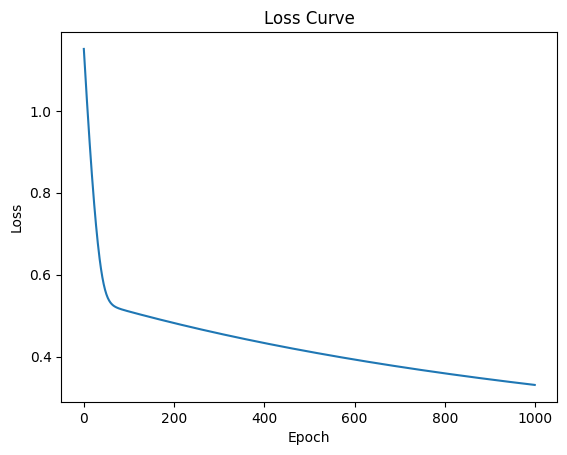

Accuracy: 93.50%


In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set a random seed for reproducibility
torch.manual_seed(42)

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Define data parameters
input_size = 2
learning_rate = 0.01
num_epochs = 1000

# Create the logistic regression model
model = LogisticRegression(input_size)

# Define the loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Convert data to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

# Training loop
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Evaluate the model's accuracy
with torch.no_grad():
    predicted = (model(X_tensor) >= 0.5).float()
    accuracy = (predicted == Y_tensor).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')


Finally, we are going to visualize the predicted results and compare them to the true classifications.

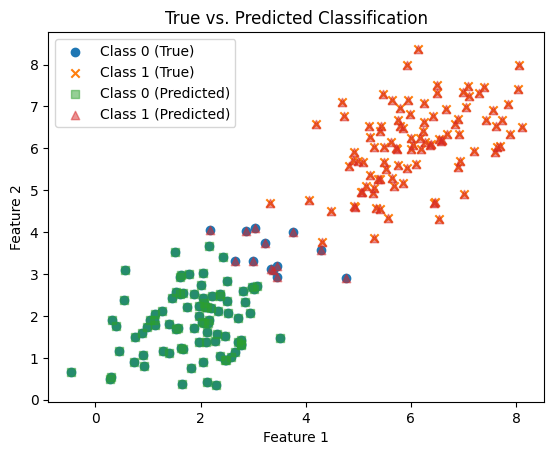

In [75]:
# Convert tensors to NumPy arrays for visualization
X_numpy = X_tensor.numpy()
Y_true = Y_tensor.numpy().squeeze()
Y_predicted = (model(X_tensor) >= 0.5).float().numpy().squeeze()

# Create a scatter plot for the true labels
plt.scatter(X_numpy[Y_true == 0][:, 0], X_numpy[Y_true == 0][:, 1], label='Class 0 (True)', marker='o')
plt.scatter(X_numpy[Y_true == 1][:, 0], X_numpy[Y_true == 1][:, 1], label='Class 1 (True)', marker='x')

# Create a scatter plot for the predicted labels
plt.scatter(X_numpy[Y_predicted == 0][:, 0], X_numpy[Y_predicted == 0][:, 1], label='Class 0 (Predicted)', marker='s', alpha=0.5)
plt.scatter(X_numpy[Y_predicted == 1][:, 0], X_numpy[Y_predicted == 1][:, 1], label='Class 1 (Predicted)', marker='^', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('True vs. Predicted Classification')
plt.legend()
plt.show()


**Q: How well does the logistic regression model classify the data points? Are there any misclassifications?**

PUT YOUR ANSWER HERE

**Q: Are there any regions of the plot where the model's predictions are particularly accurate or inaccurate?**

PUT YOUR ANSWER HERE

**Q: What suggestions or improvements can you propose to enhance the model's classification accuracy based on the plot?**

PUT YOUR ANSWER HERE